<a href="https://colab.research.google.com/github/jessicafalcundes/estatisticas-com-python-exercicios/blob/master/exercicios_probabilidade_e_amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Estatística - Probabilidade e Amostragem  
#### Desafio Final

Considerando a base de dados **populacao_brasileira.csv**, responda às questões abaixo (os dados são fictícios).  

Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

1. **Considere pessoas fluentes em inglês**, qual a **probabilidade complementar**? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela **não** ser fluente em inglês? Considere fluente quem tem o nível avançado.

In [1]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv("populacao_brasileira.csv")

# Filtrar pessoas fluentes em inglês (nível avançado)
fluent_english = df[df['nível de proficiência em inglês'] == 'Avançado']

# Calcular a probabilidade complementar
prob_not_fluent = 1 - len(fluent_english) / len(df)
print(f"Probabilidade complementar de não ser fluente em inglês: {prob_not_fluent:.2%}")

Probabilidade complementar de não ser fluente em inglês: 65.60%


2. Se uma pessoa escolhida aleatoriamente for de **Alagoas ou do Pará**, qual é a **probabilidade** de ela ter uma **renda superior a 5 mil reais**?

In [2]:
# Filtrar pessoas de Alagoas e Pará
alagoas_para = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

# Filtrar quem tem renda superior a 5 mil reais
high_income = alagoas_para[alagoas_para['renda'] > 5000]

# Calcular a probabilidade
prob_high_income = len(high_income) / len(df)
print(f"Probabilidade de uma pessoa de Alagoas ou Pará ter renda superior a 5 mil reais: {prob_high_income:.2%}")

Probabilidade de uma pessoa de Alagoas ou Pará ter renda superior a 5 mil reais: 0.40%


3. Descubra a **probabilidade** de uma pessoa, residente no estado do **Amazonas**, ter **ensino superior completo** (considerando apenas a escolaridade classificada como **'Superior'**). Qual a **probabilidade da quinta pessoa** amazonense que você conversar ter ensino superior completo?

In [3]:
# Filtrar residentes do estado do Amazonas
amazonas = df[df['estado'] == 'AM']

# Filtrar pessoas com ensino superior completo
higher_education_amazonas = amazonas[amazonas['escolaridade'] == 'Superior']

# Calcular a probabilidade
prob_higher_education_amazonas = len(higher_education_amazonas) / len(amazonas)
print(f"Probabilidade de uma pessoa do Amazonas ter ensino superior completo: {prob_higher_education_amazonas:.2%}")

# Probabilidade da quinta pessoa amazonense ter ensino superior completo
prob_fifth_person = prob_higher_education_amazonas ** 5
print(f"Probabilidade da quinta pessoa do Amazonas ter ensino superior completo: {prob_fifth_person:.6%}")

Probabilidade de uma pessoa do Amazonas ter ensino superior completo: 23.68%
Probabilidade da quinta pessoa do Amazonas ter ensino superior completo: 0.074524%


4. Considerando a **renda** das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que **faixa** (faça faixas de **1.500 reais**)? Qual é a sua **função densidade de probabilidade**?

Distribuição por faixa de renda:
faixa_renda
(0.0, 1500.0]        55
(1500.0, 3000.0]    414
(3000.0, 4500.0]    442
(4500.0, 6000.0]     89
Name: count, dtype: int64


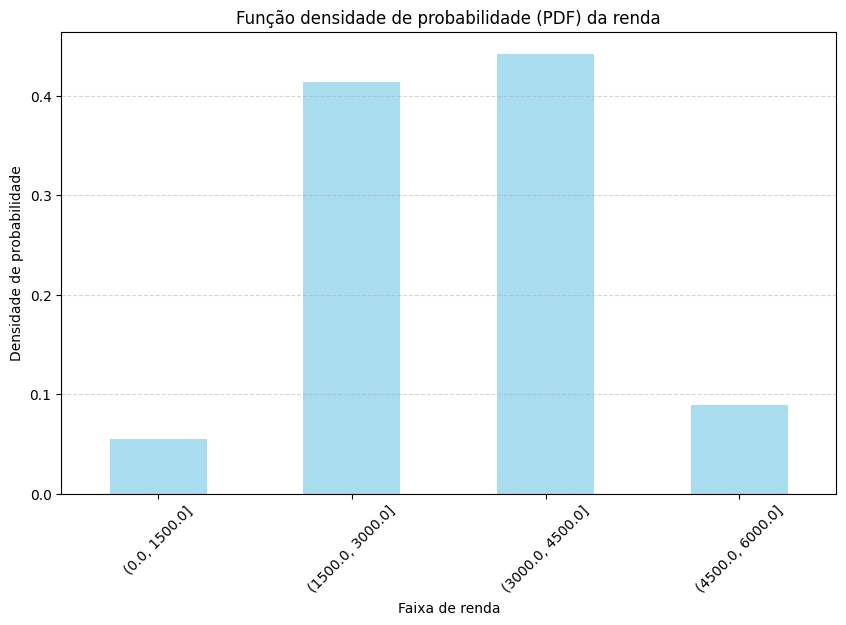

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Criar faixas de renda
bins = np.arange(0, df['renda'].max() + 1500, 1500)
df['faixa_renda'] = pd.cut(df['renda'], bins)

# Contar pessoas em cada faixa
faixa_renda_count = df['faixa_renda'].value_counts().sort_index()
print("Distribuição por faixa de renda:")
print(faixa_renda_count)

# Função densidade de probabilidade (PDF)
pdf = faixa_renda_count / faixa_renda_count.sum()

# Visualizar a PDF em gráfico
plt.figure(figsize=(10, 6))
pdf.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Função densidade de probabilidade (PDF) da renda")
plt.xlabel("Faixa de renda")
plt.ylabel("Densidade de probabilidade")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

5. **Calcule a média e a variância** da renda da amostra. Depois, faça a **distribuição normal** e inclua o **gráfico**.

Média da renda: 3082.54
Variância da renda: 993156.23


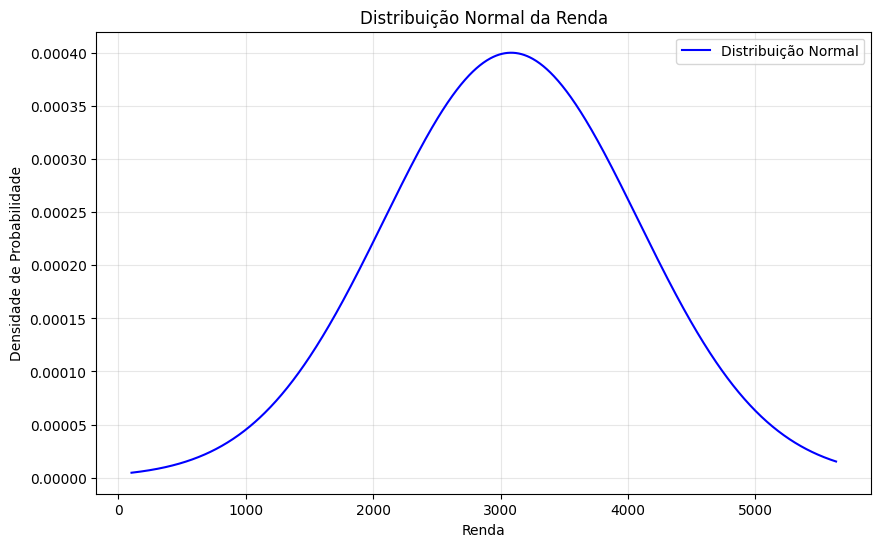

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média e a variância da renda
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f"Média da renda: {media_renda:.2f}")
print(f"Variância da renda: {variancia_renda:.2f}")

# Criar uma distribuição normal baseada na média e variância
x = np.linspace(df['renda'].min(), df['renda'].max(), 1000)
y = (1 / (np.sqrt(2 * np.pi * variancia_renda))) * np.exp(-((x - media_renda)**2) / (2 * variancia_renda))

# Plotar o gráfico da distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição Normal', color='blue')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

6. Primeiro, considere a **probabilidade** encontrada no nosso conjunto de pessoas com **escolaridade de pós-graduação**. Considerando a amostra de **1 milhão de habitantes**, qual a **probabilidade** de encontrarmos **243 mil pessoas com pós-graduação**?

In [7]:
from scipy.stats import norm

# Dados do problema
n_amostra = 1_000_000
k_sucessos = 243_000
prob_post_grad = len(post_graduate) / len(df)

# Calcular a média e o desvio padrão da distribuição binomial
media = n_amostra * prob_post_grad
desvio_padrao = (n_amostra * prob_post_grad * (1 - prob_post_grad)) ** 0.5

# Calcular a probabilidade usando a aproximação normal
z_score = (k_sucessos - media) / desvio_padrao
probabilidade_aproximada = 1 - norm.cdf(z_score)

print(f"Probabilidade aproximada de encontrar 243 mil pessoas com pós-graduação: {probabilidade_aproximada:.8f}")

Probabilidade aproximada de encontrar 243 mil pessoas com pós-graduação: 1.00000000


7. **Somando as densidades** nós temos a **função de densidade acumulada**. Considerando a coluna **"Escolaridade"**, faça a **função de densidade acumulada discreta** para cada nível de escolaridade.

In [8]:
# Contar frequência de cada nível de escolaridade
escolaridade_counts = df['escolaridade'].value_counts()

# Função de densidade acumulada discreta
cumulative_density = escolaridade_counts.sort_index().cumsum() / escolaridade_counts.sum()

print("Função de densidade acumulada discreta:")
print(cumulative_density)

Função de densidade acumulada discreta:
escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: count, dtype: float64


8. Qual a **margem de erro amostral** da **proporção populacional**, considerando a proporção de pessoas com **nível de inglês intermediário**?

In [9]:
from math import sqrt

# Filtrar pessoas com nível intermediário de inglês
intermediate_english = df[df['nível de proficiência em inglês'] == 'Intermediário']

# Calcular a proporção de pessoas com nível intermediário de inglês
p_hat = len(intermediate_english) / len(df)

# Tamanho da amostra
n = len(df)

# Valor crítico para um nível de confiança de 95%
z = 1.96

# Calcular a margem de erro
margem_erro = z * sqrt((p_hat * (1 - p_hat)) / n)
print(f"Margem de erro amostral: {margem_erro:.4f}")

Margem de erro amostral: 0.0291


9. **Calcule a renda da população**. Qual a **probabilidade** de encontrar **60 pessoas** com uma renda **mil reais superior à média**?

In [10]:
from scipy.stats import binom

# Calcular a média da renda
media_renda = df['renda'].mean()

# Filtrar pessoas com renda superior a (média + 1000)
higher_income = df[df['renda'] > (media_renda + 1000)]

# Proporção de pessoas com renda superior (probabilidade de sucesso)
p_higher_income = len(higher_income) / len(df)

# Número de tentativas (n) e sucessos desejados (k)
n = len(df)
k = 60

# Calcular probabilidade usando distribuição binomial
probabilidade = binom.pmf(k, n, p_higher_income)
print(f"Probabilidade de encontrar 60 pessoas com renda superior a {media_renda + 1000:.2f}: {probabilidade:.6f}")

Probabilidade de encontrar 60 pessoas com renda superior a 4082.54: 0.000000


10. Qual é a **probabilidade** de escolhermos uma pessoa residente na **região Sudeste** que seja **homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais**?

In [11]:
# Filtrar pessoas da região Sudeste
sudeste = df[df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])]

# Filtrar homens
homens_sudeste = sudeste[sudeste['sexo'] == 'M']

# Filtrar pessoas com ensino fundamental completo
fundamental_homens_sudeste = homens_sudeste[homens_sudeste['escolaridade'] == 'Fundamental']

# Filtrar renda superior a 2 mil reais
alta_renda_fundamental_homens_sudeste = fundamental_homens_sudeste[fundamental_homens_sudeste['renda'] > 2000]

# Calcular a probabilidade
probabilidade = len(alta_renda_fundamental_homens_sudeste) / len(df)
print(f"Probabilidade de uma pessoa residente na região Sudeste, homem, com ensino fundamental completo e renda > 2 mil reais: {probabilidade:.2%}")

Probabilidade de uma pessoa residente na região Sudeste, homem, com ensino fundamental completo e renda > 2 mil reais: 1.90%
